**Задание №1**

Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})
%matplotlib inline

In [2]:
X, y, coef = datasets.make_regression(n_samples=1000, 
                                      n_features=2, 
                                      n_informative=2, 
                                      n_targets=1, 
                                      noise=5, 
                                      coef=True, 
                                      random_state=42)

In [3]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [15]:
def eval_GD(X, y, iterations=1000, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    err = np.zeros(iterations)
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err[i-1] = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X))
        if i % (iterations / 10) == 0:
            print(i, w, err[i-1])
    return w, err

In [21]:
def eval_SGD(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) 
    n = X.shape[0] 
    err = np.zeros(iterations)
    for i in range(1, iterations + 1):
        err[i-1] = calc_mse(y, np.dot(X, w))
        ind = np.random.randint(n)
        y_pred = np.dot(X[ind], w)
        w -= alpha * (2 * np.dot((y_pred - y[ind]), X[ind]))
        if i % (iterations / 10) == 0:
            print(i, w, err[i-1])
    return w, err

In [17]:
%%time

w_gd, err_gd = eval_GD(X, y, iterations=1800, alpha=2e-3)

180 [20.17180331  3.51684976] 435.30429753364285
360 [30.26292487  5.22137774] 131.86069589063317
540 [35.43881011  6.01482667] 52.42524515064287
720 [38.0937253   6.38341978] 31.612519225900417
900 [39.4555962   6.55425375] 26.15530884551109
1080 [40.1542131   6.63322435] 24.723467361739523
1260 [40.51260546  6.66962098] 24.34757556588639
1440 [40.6964682   6.68633845] 24.248847490694864
1620 [40.79079668  6.69398672] 24.222905747090014
1800 [40.83919219  6.69746973] 24.216086867487466
CPU times: user 65.2 ms, sys: 5.88 ms, total: 71.1 ms
Wall time: 68.7 ms


In [28]:
%%time

w_sgd, err_sgd = eval_SGD(X, y, iterations=1800, alpha=2e-3)

180 [19.65529365  5.739606  ] 447.0340485118575
360 [30.40969016  6.60456365] 125.819105061513
540 [36.38916434  6.63871725] 43.01632292001611
720 [38.22725771  6.5437466 ] 30.85935754859502
900 [39.45984463  6.5536025 ] 26.13251101631995
1080 [40.13008522  6.93666013] 24.795710384722938
1260 [40.79532583  7.12797844] 24.40470219402833
1440 [41.20787704  6.77632988] 24.31731847363922
1620 [41.26482306  6.49269889] 24.38852389153994
1800 [41.14388282  6.46461217] 24.395304676881782
CPU times: user 83.4 ms, sys: 686 µs, total: 84.1 ms
Wall time: 87.9 ms


In [23]:
w_gd, err_gd

(array([40.83919219,  6.69746973]),
 array([1583.95791368, 1572.37726494, 1560.88265147, ...,   24.21612324,
          24.21610499,   24.21608687]))

In [24]:
w_sgd, err_sgd

(array([39.7383794 ,  6.77156223]),
 array([1583.95791368, 1583.92450215, 1582.27007146, 1577.86253944,
        1572.67326552, 1571.66961667, 1571.66876962, 1562.13404045,
        1543.37995186, 1543.37523695, 1543.43107623, 1541.89275528,
        1541.80843452, 1527.78213545, 1527.7522278 , 1509.29667949,
        1500.39869106, 1489.42913749, 1478.85396466, 1453.65547493,
        1451.51883629, 1445.33750473, 1444.10589647, 1432.51938854,
        1404.95065135, 1404.49802343, 1397.38767222, 1394.47593312,
        1386.58954371, 1368.38405126, 1355.88591477, 1345.23227804,
        1324.47063016, 1289.9924778 , 1266.84248466, 1253.09312479,
        1253.09602021, 1249.08109022, 1246.85520828, 1246.29117051,
        1244.45730148, 1242.62298068, 1242.25160024, 1238.36164914,
        1209.1266425 , 1205.44048075, 1204.64927944, 1200.97407773,
        1199.27252269, 1183.50037676, 1183.33431473, 1180.11617178,
        1165.54177181, 1148.95424934, 1141.99818347, 1141.39877296,
        1141

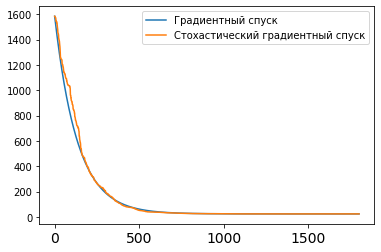

In [30]:
x = np.arange(1800)
plt.plot(x, err_gd, label="Градиентный спуск")
plt.plot(x, err_sgd, label="Стохастический градиентный спуск")
plt.legend()
plt.show()

Градиентный спуск показал здесь более быстрые результаты по сравнению с стохастическим. 

Задание №2

Добавить в алгоритм градиентного спуска L1 регуляризацию. Сравнить влияние коэффициентов регуляризации L1 и L2 на величину весов для примера из урока (лучше графически).

In [31]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8, verbose=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + 2 * lambda_ * w)
        if verbose and i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [40]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8, verbose=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + 2 * lambda_ * np.sign(w))
        if verbose and i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [33]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]]).T  # квалификация репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [35]:
def standardization(x: np.ndarray) -> np.ndarray:
    s = (x - x.mean()) / x.std()
    return s

In [37]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standardization(X[:, 1])
X_st[:, 2] = standardization(X[:, 2])
X_st[:, 3] = standardization(X[:, 3])

In [52]:
eval_model_reg2(X_st, y, iterations=1000, alpha=1e-3, lambda_=1e-8, verbose=True)

100 [10.82085912  1.29195794  1.98348487  2.85162982] 2248.0687660407552
200 [19.27186145  2.14047528  2.73306929  3.60356198] 1510.234240247458
300 [26.18957142  2.65450377  3.14650921  4.02491825] 1022.3117273467506
400 [31.85217915  2.97593535  3.36731265  4.25691774] 697.4954054124412
500 [36.48740186  3.18621662  3.4778338   4.38059399] 480.5372433000956
600 [40.28164129  3.33210452  3.52533113  4.44244068] 335.378697030888
700 [43.38747974  3.4404474   3.53692185  4.46912962] 238.174998146273
800 [45.92981598  3.52666783  3.52816433  4.47595727] 173.05307838588823
900 [48.01088803  3.59963079  3.50798338  4.47169214] 129.41144532880182
1000 [49.71438453  3.66443754  3.48149698  4.46135667] 100.15782193602467


array([49.71438453,  3.66443754,  3.48149698,  4.46135667])

In [53]:
eval_model_reg1(X_st, y, iterations=1000, alpha=1e-3, lambda_=1e-8, verbose=True)

100 [10.82085913  1.29195794  1.98348487  2.85162983] 2248.0687651959793
200 [19.27186149  2.14047528  2.7330693   3.60356199] 1510.2342376819338
300 [26.18957149  2.65450377  3.14650922  4.02491826] 1022.3117231331593
400 [31.85217926  2.97593535  3.36731265  4.25691775] 697.4953999733251
500 [36.48740201  3.18621662  3.47783381  4.380594  ] 480.5372371283447
600 [40.28164148  3.33210452  3.52533114  4.4424407 ] 335.3786905670296
700 [43.38747996  3.4404474   3.53692186  4.46912964] 238.17499173464518
800 [45.92981625  3.52666783  3.52816433  4.47595729] 173.05307226965175
900 [48.01088833  3.59963079  3.50798339  4.47169216] 129.4114396622483
1000 [49.71438486  3.66443754  3.48149698  4.46135669] 100.15781680276879


array([49.71438486,  3.66443754,  3.48149698,  4.46135669])

In [47]:
w_list = []
l_list = []
error_list = []

for l in np.logspace(start=-4, stop=1, num=20):
    l_list.append(l)
    w_new = eval_model_reg2(X_st, y, iterations=1000, alpha=1e-2, lambda_=l)
    w_list.append(w_new)
    error_list.append(calc_mse(y, np.dot(X_st, w_new)))
weights = np.array(w_list)
errors = np.array(error_list)

In [43]:
w_list = []
l_list = []
error_list = []

for l in np.logspace(start=-4, stop=1, num=20):
    l_list.append(l)
    w_new = eval_model_reg1(X_st, y, iterations=1000, alpha=1e-2, lambda_=l)
    w_list.append(w_new)
    error_list.append(calc_mse(y, np.dot(X_st, w_new)))
weights = np.array(w_list)
errors = np.array(error_list)

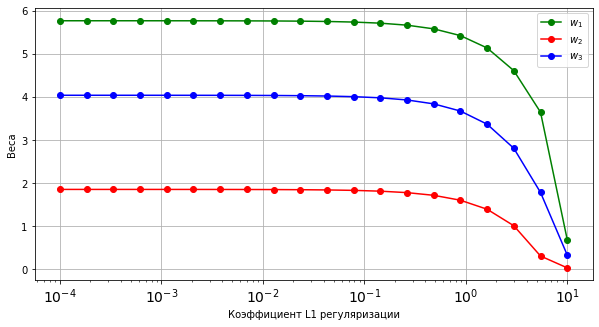

In [46]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
#plt.plot(l_list, weights[:, 0], 'mo-', label=r'$w_0$')
plt.plot(l_list, weights[:, 1], 'go-', label=r'$w_1$')
plt.plot(l_list, weights[:, 2], 'ro-', label=r'$w_2$')
plt.plot(l_list, weights[:, 3], 'bo-', label=r'$w_3$')
plt.xlabel('Коэффициент L1 регуляризации')
plt.ylabel('Веса')
plt.grid()
plt.legend();

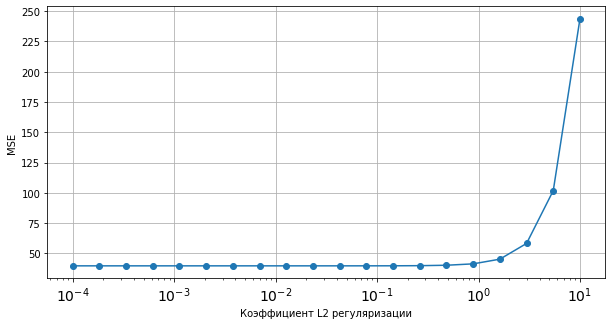

In [45]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
plt.plot(l_list, errors, 'o-')
plt.xlabel('Коэффициент L2 регуляризации')
plt.ylabel('MSE')
plt.grid();

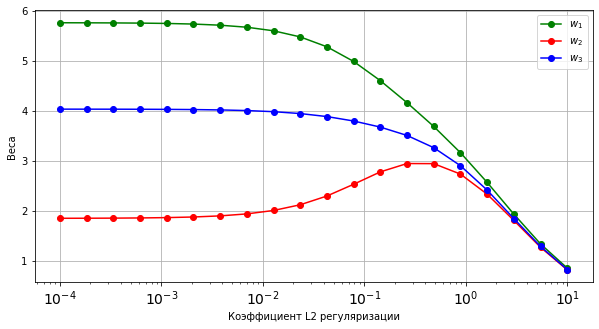

In [48]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
#plt.plot(l_list, weights[:, 0], 'mo-', label=r'$w_0$')
plt.plot(l_list, weights[:, 1], 'go-', label=r'$w_1$')
plt.plot(l_list, weights[:, 2], 'ro-', label=r'$w_2$')
plt.plot(l_list, weights[:, 3], 'bo-', label=r'$w_3$')
plt.xlabel('Коэффициент L2 регуляризации')
plt.ylabel('Веса')
plt.grid()
plt.legend();

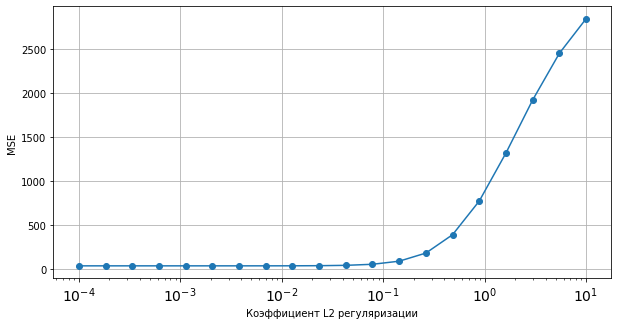

In [49]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
plt.plot(l_list, errors, 'o-')
plt.xlabel('Коэффициент L2 регуляризации')
plt.ylabel('MSE')
plt.grid();